In [1]:
# Import libraries and read data into dataframe
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_parquet('../zippedData/merged_data.parquet')

In [2]:
# Create dataframe filtered by last 10 years of data
recent = df.loc[df.release_date.dt.year >= 2012]

# Create dataframe expanded along genres using pd.explode
expanded_genres = recent.explode('genres')

In [3]:
# Create dataframe grouped by genres with mean ROI, mean product budget, and a count of titles in the genre
groupby_genres_mean = expanded_genres.groupby('genres').agg({'ROI': 'mean', 'prod_budget': 'mean', 'title': 'count'}).sort_values('ROI', ascending=False)

# Recast title column as int for use in further filtering
groupby_genres_mean.title = groupby_genres_mean.title.astype(int)

# Filter by genres that have at least 100 titles in data set
groupby_genres_mean = groupby_genres_mean.loc[groupby_genres_mean.title >= 75]

# Create a dataframe that represents the top 5 genres by mean ROI
top_6_by_mean = groupby_genres_mean.nlargest(6, 'ROI')

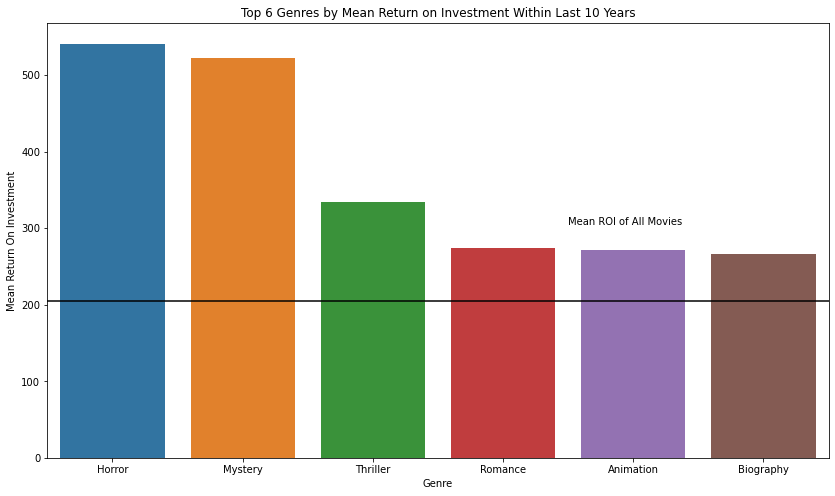

In [4]:
# Create a bar plot representing the top 5 genres by mean ROI created within the last 10 years
# Declare figure and axis objects
fig, ax = plt.subplots(figsize=(14,8))

# Create seaborn barplot, assign to ax
sns.barplot(data=top_6_by_mean, x=top_6_by_mean.index, y='ROI', ax=ax)

# Set axis labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Mean Return On Investment')
ax.set_title('Top 6 Genres by Mean Return on Investment Within Last 10 Years')

# Create a horizontal line representing the mean ROI for all films regardless of genre to compare to whole industry
# Create an annotation for the line
ax.axhline(y=recent.ROI.mean(), c='k')
ax.annotate('Mean ROI of All Movies',(3.5, float(recent.ROI.mean()) + 100));

In [5]:
expanded_genres.groupby('genres').agg({'ROI': 'median', 'prod_budget': 'median', 'title': 'count'}).sort_values('ROI', ascending=False)

,ROI,prod_budget,title
genres,,,
Animation,198.256071,75000000,90
Mystery,177.061834,10000000,130
Horror,166.547080,7000000,173
Fantasy,164.645551,85000000,150
Family,162.794441,60000000,137
Adventure,161.933473,95000000,309
Comedy,152.617788,25000000,435
Sci-Fi,145.944250,89000000,168
Romance,131.566711,15850000,162


In [6]:
# Create dataframe grouped by genres with median ROI, median product budget, and a count of titles in the genre
groupby_genres_median = expanded_genres.groupby('genres').agg({'ROI': 'median', 'prod_budget': 'median', 'title': 'count'}).sort_values('ROI', ascending=False)

# Recast title column as int for use in further filtering
groupby_genres_median.title = groupby_genres_median.title.astype(int)

# Filter by genres that have at least 100 titles in data set
groupby_genres_median = groupby_genres_median.loc[groupby_genres_median.title >= 75]

# Create a dataframe that represents the top 5 genres by median ROI
top_6_by_median = groupby_genres_median.nlargest(6, 'ROI')

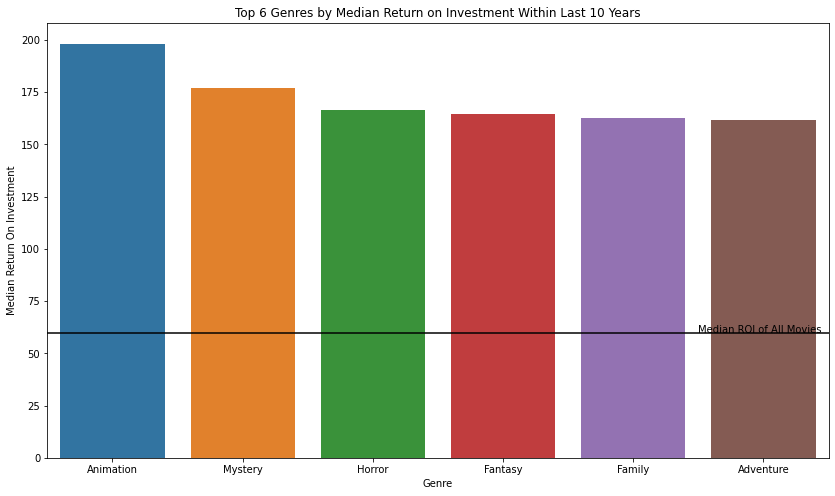

In [7]:
# Create a bar plot representing the top 5 genres by median ROI created within the last 10 years
# Declare figure and axis objects
fig, ax = plt.subplots(figsize=(14,8))

# Create seaborn barplot, assign to ax
sns.barplot(data=top_6_by_median, x=top_6_by_median.index, y='ROI', ax=ax)

# Set axis labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Median Return On Investment')
ax.set_title('Top 6 Genres by Median Return on Investment Within Last 10 Years')

# Create a horizontal line representing the median ROI for all films regardless of genre to compare to whole industry
# Create an annotation for the line
ax.axhline(y=recent.ROI.median(), c='k')
ax.annotate('Median ROI of All Movies',(4.5, recent.ROI.median()));

In [8]:
# Create a dataframe grouped by genres then ROI, reset index to turn back into a dataframe rather than groupby object
# This allows grouping of data without having to use aggregate functions
groupby_genres_ROI = expanded_genres.groupby(['genres', 'ROI']).first()
groupby_genres_ROI = groupby_genres_ROI.reset_index()

In [9]:
# Declare a set of genres to evaluate (selected from the combined list of top 5 by median and top 5 by mean)
genres_to_evaluate = set(list(top_6_by_mean.index))
for item in list(top_6_by_median.index):
    genres_to_evaluate.add(item)
genres_to_evaluate = list(genres_to_evaluate)
#genres_to_evaluate = ['Mystery', 'Horror', 'Fantasy', 'Family', 'Adventure', 'Thriller', 'Romance', 'Biography']

# Create dataframes representing the top 9 genres and the 6 genres by median (less influenced by outliers)
top_9_genres_raw_ROI = groupby_genres_ROI.loc[groupby_genres_ROI.genres.isin(genres_to_evaluate)]
top_6_genres_by_median_raw_ROI = top_9_genres_raw_ROI.loc[top_9_genres_raw_ROI.genres.isin(list(top_6_by_median.index))]

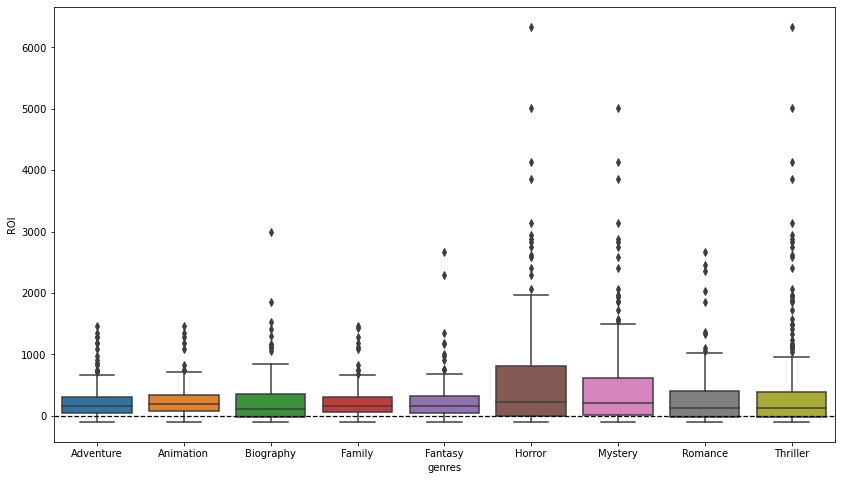

In [10]:
# Create boxplots for each of the top 8 genres
# Declare fig, ax objects
fig, ax = plt.subplots(figsize=(14,8))

# Create seaborn boxplot
sns.boxplot(data=top_9_genres_raw_ROI, x='genres', y='ROI', ax=ax)

# Create a horizontal line at ROI = 0 for clarity
ax.axhline(y=0, linestyle='--', linewidth=1.25, c='k');

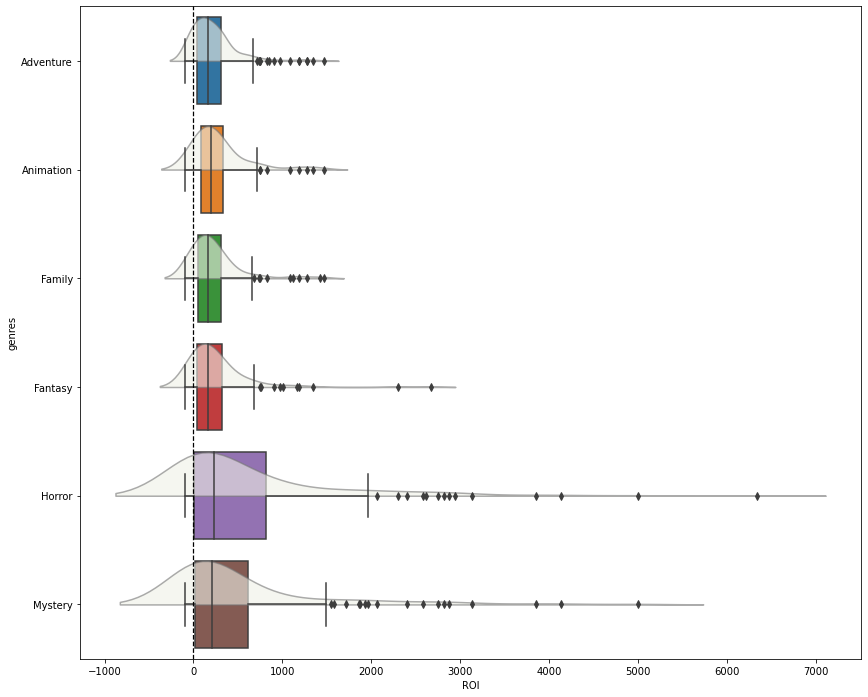

In [11]:
# Create an overlaid boxplot and violinplot for the top 5 genres by median to show distributions
# Declare fig, ax objects
fig, ax = plt.subplots(figsize=(14,12))

# Create seaborn boxplot
sns.boxplot(data=top_6_genres_by_median_raw_ROI, y='genres', x='ROI', orient='h', ax=ax)

# Create seaborn violinplot, forcibly creating a half violin by hueing only on true
sns.violinplot(data=top_6_genres_by_median_raw_ROI,
               orient='h',
               y='genres',
               x='ROI',
               inner='box',
               hue=True,
               hue_order = [True,False],
               split=True,
               color='#e7f294',
               ax=ax);

# Suppress legend created due to tricking violinplot to create half violin
ax.legend_ = None

# Set opacity of violinplot to 0.6
plt.setp(ax.collections, alpha=0.6)

# Create vertical line at ROI = 0 for clarity
ax.axvline(x=0, c='k', linestyle='--', linewidth=1.25)


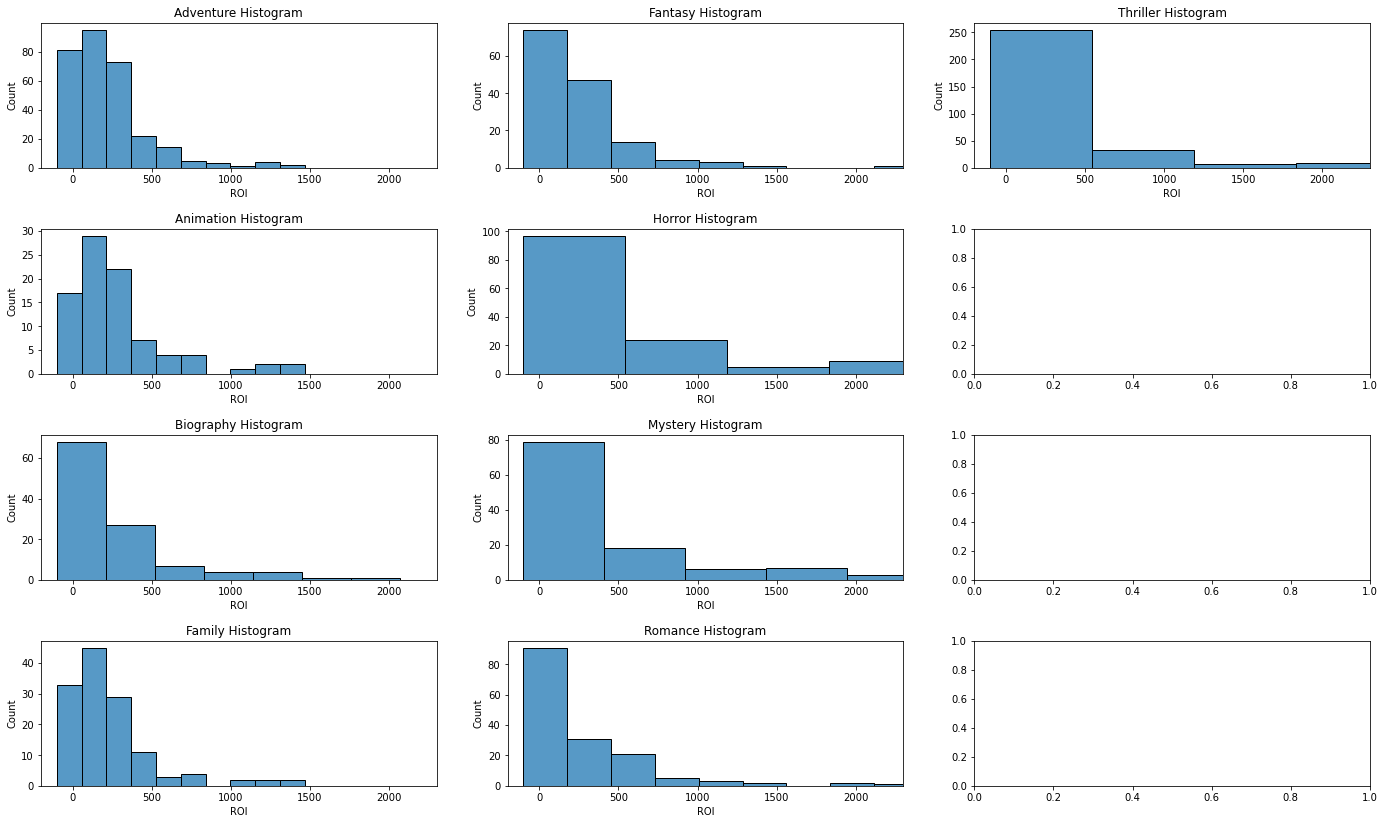

In [12]:
# Create a set of histograms for each of the top 8 genres in one figure
# Declare fig, ax objects, use 4 by 2 shape to accomodate 8 plots
fig, ax = plt.subplots(4,3, figsize=(20,12))

# Set tight layout with padding so labels do not overlap
plt.tight_layout(pad = 4.0)

# For each genre, create a seaborn histplot with 10 bins and correct title labels
for index, genre in enumerate(list(top_9_genres_raw_ROI.genres.unique())):
    axis = ax[index % 4][index // 4]
    sns.histplot(data = top_9_genres_raw_ROI,
                 x = top_9_genres_raw_ROI.loc[top_9_genres_raw_ROI.genres == genre].ROI,
                 common_norm = False,
                 bins = 10,
                 ax = axis);
    axis.set_xlim([-200, 2300])
    axis.set_title('{} Histogram'.format(genre));

# Show plot
plt.show()

In [13]:
recent.describe()

,ROI,profit,prod_budget,dom_gross,world_gross,runtime_min
count,1646.000000,1.646000e+03,1.646000e+03,1.646000e+03,1.646000e+03,1147.000000
mean,204.861334,8.144739e+07,3.747438e+07,4.650725e+07,1.189218e+08,108.363557
std,523.385146,1.884086e+08,5.321560e+07,8.502373e+07,2.281259e+08,18.516947
min,-100.000000,-2.002376e+08,1.400000e+03,0.000000e+00,0.000000e+00,5.000000
25%,-83.632054,-1.961108e+06,4.000000e+06,2.430200e+04,6.240118e+05,95.000000
50%,59.828747,9.339008e+06,1.600000e+07,1.375355e+07,2.929901e+07,106.000000
75%,279.062809,7.679578e+07,4.500000e+07,5.458736e+07,1.196188e+08,119.000000
max,6336.419800,1.748134e+09,3.500000e+08,9.366622e+08,2.053311e+09,180.000000


In [14]:
recent.runtime_min.notna()

1        True
2        True
10       True
11       True
14      False
        ...  
5684     True
5686     True
5691     True
5693     True
5694     True
Name: runtime_min, Length: 1646, dtype: bool

In [15]:
runtime_category_df = recent.copy()
runtime_category_df = runtime_category_df.loc[runtime_category_df.runtime_min.notna()]

In [16]:
runtime_category_df.describe()

,ROI,profit,prod_budget,dom_gross,world_gross,runtime_min
count,1147.000000,1.147000e+03,1.147000e+03,1.147000e+03,1.147000e+03,1147.000000
mean,244.960689,1.056333e+08,4.597481e+07,5.995599e+07,1.516081e+08,108.363557
std,491.471109,2.066934e+08,5.795431e+07,9.058475e+07,2.492252e+08,18.516947
min,-100.000000,-2.002376e+08,1.500000e+04,0.000000e+00,0.000000e+00,5.000000
25%,-26.893889,-6.500000e+05,8.000000e+06,3.735784e+06,8.690655e+06,95.000000
50%,118.648403,2.558430e+07,2.200000e+07,2.980726e+07,5.405225e+07,106.000000
75%,311.731045,1.122841e+08,5.900000e+07,7.039253e+07,1.699423e+08,119.000000
max,5007.359020,1.748134e+09,3.500000e+08,7.000596e+08,2.048134e+09,180.000000


In [17]:
def get_runtime_length(runtime):
    if runtime <= 106:
        return 'short'
    else:
        return 'long'
    

runtime_category_df['runtime_bin'] = runtime_category_df.runtime_min.apply(lambda x: get_runtime_length(x))
runtime_category_df

,title,ROI,profit,prod_budget,dom_gross,world_gross,genres,director,writer,runtime_min,release_date,runtime_bin
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,"[Drama, Sci-Fi, Mystery, Horror, Thriller]",[Dan Trachtenberg],"[Josh Campbell, Matthew Stuecken, Damien Chaze...",103.0,2016-03-11,short
2,10 days in a madhouse,-99.878200,-11985384,12000000,14616,14616,[Drama],[Timothy Hines],[Timothy Hines],111.0,2015-11-11,long
10,12 strong,103.195366,36118378,35000000,45819713,71118378,"[War, Drama, History, Action]",[Nicolai Fuglsig],"[Ted Tally, Doug Stanton, Peter Craig]",130.0,2018-01-19,long
11,12 years a slave,805.126715,161025343,20000000,56671993,181025343,"[Biography, Drama, History]",[Steve McQueen],"[John Ridley, Solomon Northup]",134.0,2013-10-18,long
15,13 sins,-98.811200,-3952448,4000000,9134,47552,"[Thriller, Horror]",[Daniel Stamm],"[David Birke, Chookiat Sakveerakul, Daniel Sta...",93.0,2014-04-18,short
...,...,...,...,...,...,...,...,...,...,...,...,...
5684,zipper,-100.000000,-4500000,4500000,0,0,"[Thriller, Drama]",[Mora Stephens],"[Joel Viertel, Mora Stephens]",112.0,2015-08-28,long
5686,zombie hunter,-100.000000,-1000000,1000000,0,0,"[Comedy, Action, Horror]",[K. King],"[K. King, Kurt Knight]",93.0,2013-10-08,short
5691,zoolander 2,10.697386,5348693,50000000,28848693,55348693,[Comedy],[Ben Stiller],"[John Hamburg, Justin Theroux, Nicholas Stolle...",101.0,2016-02-12,short
5693,zootopia,579.619744,869429616,150000000,341268248,1019429616,"[Comedy, Animation, Family, Adventure]","[Rich Moore, Byron Howard, Jared Bush]","[Phil Johnston, Josie Trinidad, Rich Moore, Je...",108.0,2016-03-04,long


In [18]:
runtime_category_df.groupby('runtime_bin')['ROI'].median()

runtime_bin
long     145.179525
short     89.258588
Name: ROI, dtype: float64

In [19]:
runtime_category_df.runtime_bin.value_counts()

short    600
long     547
Name: runtime_bin, dtype: int64

In [20]:
runtime_category_df.groupby(['runtime_bin', 'ROI']).agg(lambda x: set(x)).reset_index()

,runtime_bin,ROI,title,profit,prod_budget,dom_gross,world_gross,runtime_min,release_date
0,long,-100.000000,"{the ridiculous 6, velvet buzzsaw, blinded by ...","{-1000000, -19800000, -90000000, -1800000, -15...","{1000000, 1800000, 15000000, 90000000, 1980000...",{0},{0},"{111.0, 112.0, 113.0, 117.0, 119.0, 122.0, 124.0}","{2019-02-01 00:00:00, 2017-12-13 00:00:00, 201..."
1,long,-99.878200,{10 days in a madhouse},{-11985384},{12000000},{14616},{14616},{111.0},{2015-11-11 00:00:00}
2,long,-99.640267,{closer to the moon},{-1494604},{1500000},{0},{5396},{112.0},{2014-04-17 00:00:00}
3,long,-99.429667,{the looking glass},{-298289},{300000},{1711},{1711},{110.0},{2015-10-23 00:00:00}
4,long,-99.345053,{vaalu},{-1887556},{1900000},{0},{12444},{155.0},{2015-12-31 00:00:00}
...,...,...,...,...,...,...,...,...,...
1053,short,2942.219367,{the purge},{88266581},{3000000},{64473115},{91266581},{85.0},{2013-06-07 00:00:00}
1054,short,3138.430300,{insidious chapter 2},{156921515},{5000000},{83586447},{161921515},{106.0},{2013-09-13 00:00:00}
1055,short,3851.737231,{annabelle},{250362920},{6500000},{84273813},{256862920},{99.0},{2014-10-03 00:00:00}
1056,short,4141.172100,{chernobyl diaries},{41411721},{1000000},{18119640},{42411721},{86.0},{2012-05-25 00:00:00}


In [21]:
test = runtime_category_df.groupby(['runtime_bin', 'ROI']).first().reset_index()

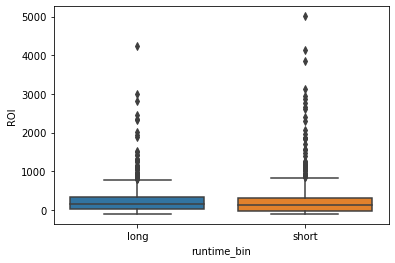

In [22]:
fig,ax = plt.subplots()

sns.boxplot(data=test, x='runtime_bin', y='ROI', ax=ax);

#ax.set_ylim([-200,2000]);

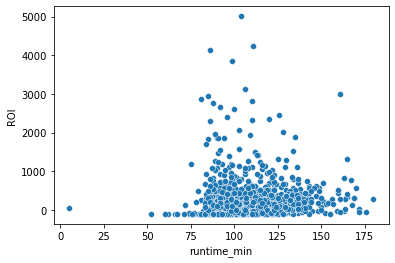

In [23]:
sns.scatterplot(data=recent, x='runtime_min', y='ROI');